In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision  #包括数据库，图片数据库等
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False  #已下载至本地

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train = True, #training data ,if False ,test data
    transform = torchvision.transforms.ToTensor(),  #(0,1) <-(0-255)
    download=DOWNLOAD_MNIST # has download, set false
    )
test_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]
print(train_data.train_data.size())
print(train_data.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


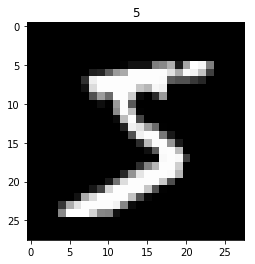

In [6]:
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()


In [7]:
train_loader = Data.DataLoader(dataset=train_data,
                        batch_size = BATCH_SIZE,
                        shuffle=True,
                        )


In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization
    

In [9]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [10]:
optimizer = torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()


In [11]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.item(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3045 | test accuracy: 0.13
Epoch:  0 | train loss: 0.5239 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1816 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1831 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1754 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1254 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0194 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1061 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1290 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0372 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0238 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0356 | test accuracy: 0.97
